In [16]:
import wandb
import json
from analysis_utils import METRIC_NAMES
import pandas as pd

In [ ]:
api = wandb.Api()
runs = api.runs(f"eli-carrami/Cprt-Paper-Tests")
real_res = {}
for r in runs:
    c = json.loads(r.json_config)
    if "holder" not in r.name:
        ckpt = c["checkpoint"]["value"]["path"].split("_")
        ckpt_id = f"{ckpt[0]}:{ckpt[-1].split('.')[0].strip('step')}"
        if ckpt_id not in real_res or 'seed' in r.name:
            real_res[ckpt_id] = {k.split("/")[0]: v for k, v in r.summary.items() if '/correct' in k} | {'run': r.name}
print(real_res)

In [85]:
print(len(real_res))

14


In [86]:
ids, steps = zip(*[i.split(":") for i in real_res])

In [119]:
api = wandb.Api()
runs = api.runs(f"eli-carrami/Cprt-Paper-Checkpoints")
light_res = {}
for r in runs:
    c = json.loads(r.json_config)
    if r.id in ids:
        gs = [j for i, j in zip(ids, steps) if i == r.id]
        print(r.name, gs)
        keys = [i for i in METRIC_NAMES.keys() if '/' in i]
        keys = ["trainer/global_step", "epoch"] + keys
        df = pd.DataFrame(r.scan_history(keys=keys))
        df["avg_binary_loc_f1"] = df[[col for col in df.columns if "_in_" in col]].mean(axis=1)
        for s in gs:
            dct = df[df['trainer/global_step'] == int(s) - 1].to_dict(orient='split', index=False)
            light_res[f"{r.id}:{s}"] = {METRIC_NAMES[k]: v for k, v in zip(dct["columns"], dct["data"][0]) if k in METRIC_NAMES}
light_res

serene-shadow-9 ['44817', '313723']
fresh-vortex-8 ['375780', '150312']
zany-spaceship-68 ['224210', '134526']
treasured-pyramid-5 ['216679']
polished-smoke-42 ['100840']
dauntless-surf-44 ['358891']
solar-voice-33 ['150144']
polished-monkey-31 ['224085']
vague-silence-25 ['616244', '448177']
legendary-glitter-15 ['156856']


{'vd5nx0wu:44817': {'is_real F1': 0.9889151073508097,
  'is_enzyme F1': 0.8782136566028342,
  'kingdom F1': 0.8026929706222407,
  'localization F1': 0.763233272667235,
  'cofactor Recall': 0.4956521739130435,
  'is_fake F1': 0.9339773380703664,
  'MW MALE': 0.03918073741316218,
  'perplexity': 2.1279795169830322,
  'rouge1 Score': 0.7689962387084961,
  'rouge1 Precision': 0.7709556818008423,
  'rouge1 Recall': 0.7674090266227722,
  'rouge2 Score': 0.6001951694488525,
  'rouge2 Precision': 0.601500391960144,
  'rouge2 Recall': 0.5991753339767456,
  'rougeL Score': 0.7611386179924011,
  'rougeL Precision': 0.7630510926246643,
  'rougeL Recall': 0.7595905661582947,
  'in_membrane F1': 0.24580221967097607,
  'in_nucleus F1': 0.37161780424492286,
  'in_mitochondria F1': 0.19740522969549215,
  'binary localization\naverage F1': 0.2716084178704637},
 'vd5nx0wu:313723': {'is_real F1': 0.9944576266405043,
  'is_enzyme F1': 0.8953420048212133,
  'kingdom F1': 0.7788166169587704,
  'localization 

In [206]:
pd.DataFrame(light_res).T.sort_index()

,is_real F1,is_enzyme F1,kingdom F1,localization F1,cofactor Recall,is_fake F1,MW MALE,perplexity,rouge1 Score,rouge1 Precision,...,rouge2 Score,rouge2 Precision,rouge2 Recall,rougeL Score,rougeL Precision,rougeL Recall,in_membrane F1,in_nucleus F1,in_mitochondria F1,binary localization\naverage F1
1xvwntxd:224085,0.979411,0.862073,0.668127,0.700162,0.473913,0.015028,0.041928,1.727936,0.689237,0.751007,...,0.536282,0.588601,0.494402,0.675456,0.735596,0.626206,0.189345,0.122917,0.041002,0.117755
9n7lc43f:150144,0.991291,0.885538,0.878950,0.775262,0.591304,0.335975,0.042550,2.279692,0.645069,0.688891,...,0.462847,0.496903,0.433981,0.633179,0.676084,0.596285,0.598910,0.759153,0.557681,0.638581
fm9pxtkz:216679,0.983194,0.496869,0.670463,0.321092,0.404494,0.079783,1.512740,2.397212,0.588904,0.628246,...,0.409765,0.440003,0.384701,0.579575,0.618363,0.546838,0.328700,0.631659,0.241191,0.400517
h95vdy7f:150312,0.986220,0.873164,0.832332,0.779938,0.532468,0.017460,0.038579,2.282498,0.645101,0.686545,...,0.465034,0.497429,0.437327,0.633352,0.673984,0.598118,0.382131,0.768661,0.402542,0.517778
h95vdy7f:375780,0.988655,0.894529,0.861818,0.728082,0.632035,0.011182,0.028982,2.139542,0.652128,0.694817,...,0.480466,0.514503,0.451446,0.641185,0.683088,0.604950,0.461930,0.771152,0.481944,0.571675
nb30cnqt:358891,0.987032,0.883717,0.901121,0.699955,0.606061,0.322386,0.028760,1.892376,0.652445,0.663484,...,0.498319,0.507330,0.491146,0.638756,0.649529,0.629997,0.389350,0.561419,0.400387,0.450385
pefb5f6v:156856,0.989307,0.889479,0.835275,0.780914,0.565217,0.980991,0.061956,1.962734,0.663072,0.710991,...,0.507117,0.547638,0.473833,0.650068,0.697002,0.610652,0.342321,0.710948,0.367271,0.473513
qmqpl5l8:448177,0.984164,0.878528,0.663683,0.756910,0.656522,0.039667,0.014456,1.831328,0.679641,0.698909,...,0.501381,0.516418,0.487688,0.669661,0.688608,0.652292,0.234017,0.623729,0.274641,0.377462
qmqpl5l8:616244,0.989707,0.886504,0.769021,0.707307,0.678261,0.022446,0.016253,1.801780,0.696226,0.725237,...,0.510399,0.532931,0.490740,0.688263,0.716970,0.662951,0.225316,0.657909,0.317506,0.400244
vd5nx0wu:313723,0.994458,0.895342,0.778817,0.754989,0.604348,0.333492,0.030609,1.880740,0.785443,0.786900,...,0.623618,0.624621,0.622860,0.778631,0.780060,0.777505,0.298283,0.366082,0.171033,0.278466


In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

real_map = {"catalytic activity": "Reaction", "functional domains": "Domains", "cofactor": "Cofactor"}
light_map = {
    "MW MALE": "mw", "cofactor Recall": "exact\ncofactor",
    "is_enzyme F1": "is_enzyme", "localization F1": "location",
    "binary localization\naverage F1": "binary Q", "perplexity": "perplexity",
    "rouge1 Score": "ROUGE1", "rougeL Score": "ROUGEL"
}

def find_correlations_and_plot_heatmap(dict1, dict2):
    # Convert dictionaries to dataframes
    df1 = pd.DataFrame(dict1).T.sort_index()
    df2 = pd.DataFrame(dict2).T.sort_index()

    df1.rename(columns=real_map, inplace=True)
    df2.rename(columns=light_map, inplace=True)

    df1 = df1[list(real_map.values())]
    df2 = df2[list(light_map.values())]

    # Convert all columns to numeric, non-convertible values become NaN
    df1 = df1.apply(pd.to_numeric, errors='coerce')
    df2 = df2.apply(pd.to_numeric, errors='coerce')

    # Drop columns that are entirely NaN (were non-numeric)
    df1 = df1.dropna(axis=1, how='all')
    df2 = df2.dropna(axis=1, how='all')

    # Initialize a correlation matrix
    correlation_matrix = np.zeros((len(df1.columns), len(df2.columns)))

    # Populate the correlation matrix
    for i, col1 in enumerate(df1.columns):
        for j, col2 in enumerate(df2.columns):
            # Calculate Pearson correlation only if no NaN values
            if not df1[col1].isna().any() and not df2[col2].isna().any():
                corr, _ = pearsonr(df1[col1], df2[col2])
                correlation_matrix[i, j] = corr
            else:
                correlation_matrix[i, j] = np.nan

    # Check if the correlation matrix is valid for plotting
    if np.isnan(correlation_matrix).all():
        print("Insufficient valid data for correlation heatmap.")
        return

    cdict = {
        'red':   ((0.0, 1.0, 1.0),   # red at 0%
                  (0.5, 1.0, 1.0),   # white (red stays at full) at 50%
                  (1.0, 0.0, 0.0)),  # green (red goes to 0) at 100%
        'green': ((0.0, 0.0, 0.0),   # red at 0%
                  (0.5, 1.0, 1.0),   # white (green goes to full) at 50%
                  (1.0, 1.0, 1.0)),  # green at 100%
        'blue':  ((0.0, 0.0, 0.0),   # red at 0%
                  (0.5, 1.0, 1.0),   # white (blue goes to full) at 50%
                  (1.0, 0.0, 0.0))   # green (blue goes to 0) at 100%
    }

    custom_cmap = LinearSegmentedColormap('red_white_green', cdict)

    correlation_df = pd.DataFrame(correlation_matrix, index=df1.columns, columns=df2.columns)
    sns.heatmap(correlation_df.abs(), annot=True, fmt=".2f", cmap=custom_cmap, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
    plt.title('Absolute Correlation Heatmap', fontsize=14, fontweight='bold', pad=10)
    plt.ylabel('Biochem-ReAct\nBenchmarks', fontsize=11, fontweight='bold')
    plt.xlabel('Biochem-Lite / Linguistic Benchmarks', fontsize=11, fontweight='bold')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11, rotation=0)

    ax = plt.gca()
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.title.set_position([0.5, 120])

    plt.show()


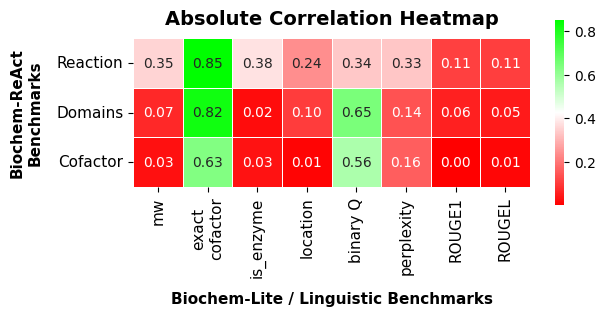

In [212]:
find_correlations_and_plot_heatmap(real_res, light_res)